## 신경망 

## 필요한 라이브러리 임포트

- pandas는 데이터를 로드하고 처리하는 데 사용
- tensorflow.keras는 모델 구축 및 훈련을 위한 함수와 클래스 사용
- sklearn은 데이터 분할과 레이블 인코딩

In [1]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## 데이터 로딩 및 전처리
- 엑셀 파일에서 데이터를 로드하고, 텍스트 데이터와 레이블을 준비

In [2]:
# 엑셀 파일 로딩
file_path = 'molit.xlsx'
data = pd.read_excel(file_path)

# 설명 컬럼과 레이블 컬럼 선택
texts = data['설명'].astype(str)  # 설명 컬럼
labels = data['카테고리']  # 카테고리 레이블

texts, labels

(0        (공동주택 수의계약정보)공동주택관리시스템에 축적된 공동주택별 공동주택위탁관리, 공사...
 1                             JDC지정면세점_입점업체 정보(2002-2015년)
 2        ※ 한국부동산원에서는 '부동산통계정보시스템(R-ONE)' 고도화로 인해 해당 API...
 3        기준년도, 전년도, 전전년도(총계 금액, 총계 면적, 협의취득 금액, 협의취득 면적...
 4        소관부처명, 사업기관조직코드, 토지면적(기준년도, 전년도, 전전년도), 토지금액(기...
                                ...                        
 23674                   통계청(KOSIS)에서 제공하는 교통문화지수(시도/시/군/구)
 23675         통계청(KOSIS)에서 제공하는 자동차 천대당 교통사고발생건수(시도/시/군/구)
 23676             통계청(KOSIS)에서 제공하는 1인당 자동차 등록대수(시도/시/군/구)
 23677                    통계청(KOSIS)에서 제공하는 지가변동률(시도/시/군/구)
 23678                        일간 수집된 교통 데이터의 노선, 정류장 별 이용통계
 Name: 설명, Length: 23679, dtype: object,
 0        국토도시
 1        국토도시
 2          일반
 3        교통물류
 4        교통물류
          ... 
 23674    국토도시
 23675    국토도시
 23676    국토도시
 23677    국토도시
 23678    국토도시
 Name: 카테고리, Length: 23679, dtype: object)

## 데이터 로딩 및 전처리
### 텍스트 토큰화 및 시퀀스 패딩
- Tokenizer는 텍스트를 정수 시퀀스로 변환
- pad_sequences는 모든 시퀀스를 같은 길이로 맞추기 위해 패딩을 추가

In [3]:
# 텍스트 토큰화 및 시퀀스 변환
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded_sequences = pad_sequences(sequences, maxlen=100)

# 레이블 인코딩
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

# 훈련 데이터와 테스트 데이터 분리
X_train, X_test, y_train, y_test = \
    train_test_split(padded_sequences, encoded_labels, test_size=0.2, random_state=42)

## 모델 구축
- Embedding 레이어는 단어를 밀집 벡터로 매핑
- LSTM 레이어는 시퀀스 데이터의 특성을 학습
- Dense 레이어는 최종 출력을 클래스 수에 맞춰 예측

In [4]:
model = Sequential([
    Embedding(10000, 128),
    LSTM(64),
    Dense(len(encoder.classes_), activation='softmax')
])

model

<Sequential name=sequential, built=False>

## 모델 컴파일
- compile 메서드는 학습을 위한 설정하고, adam optimizer와 크로스 엔트로피 손실 함수를 사용

In [5]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model

<Sequential name=sequential, built=False>

## 모델 훈련

In [6]:
history = model.fit(X_train, y_train, batch_size=64, epochs=20, validation_data=(X_test, y_test))


Epoch 1/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.6646 - loss: 1.1051 - val_accuracy: 0.8932 - val_loss: 0.3460
Epoch 2/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9154 - loss: 0.2729 - val_accuracy: 0.9179 - val_loss: 0.2690
Epoch 3/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9508 - loss: 0.1619 - val_accuracy: 0.9244 - val_loss: 0.2563
Epoch 4/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9682 - loss: 0.1138 - val_accuracy: 0.9267 - val_loss: 0.2740
Epoch 5/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 46ms/step - accuracy: 0.9759 - loss: 0.0809 - val_accuracy: 0.9286 - val_loss: 0.2902
Epoch 6/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 47ms/step - accuracy: 0.9813 - loss: 0.0637 - val_accuracy: 0.9227 - val_loss: 0.3134
Epoch 7/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.9818 - loss: 0.0590 - val_accuracy: 0.9282 - val_loss: 0.2824
Epoch 8/20
296/296 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.9819 - loss: 0.0542 - 

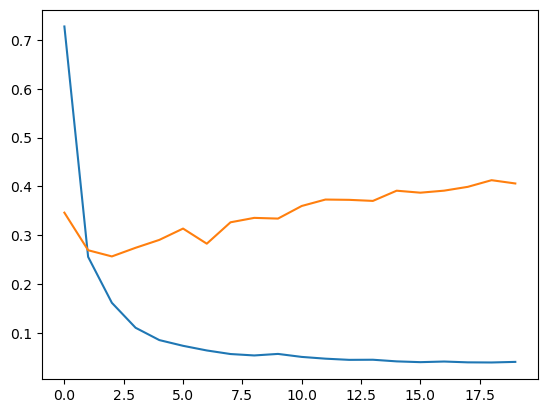

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

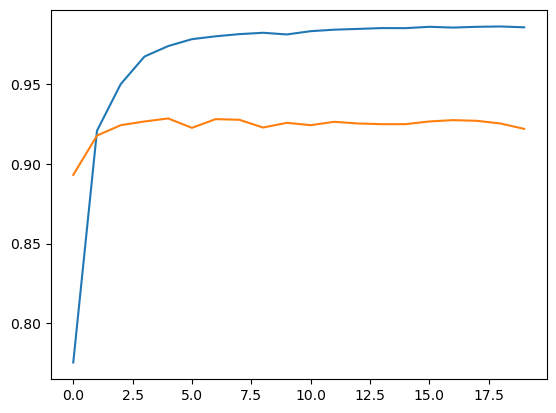

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

## 모델 저장 

In [9]:
model.save('text_classification_model.h5')


## 예측

In [10]:
predictions = model.predict(X_test)
predicted_categories = encoder.inverse_transform(predictions.argmax(axis=1))

predictions, predicted_categories

148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


(array([[3.51765323e-07, 4.98391910e-06, 9.99990821e-01, ...,
         4.90423929e-07, 1.16870513e-06, 3.91074622e-07],
        [1.48307151e-06, 1.07171422e-06, 9.99993324e-01, ...,
         4.13913853e-07, 4.02082605e-07, 2.90169083e-07],
        [7.55402880e-07, 2.76824579e-07, 1.15332746e-07, ...,
         4.03122101e-07, 8.04919353e-07, 3.51846182e-07],
        ...,
        [8.56816471e-01, 8.04229348e-04, 4.62381169e-03, ...,
         2.13131271e-02, 1.10587385e-02, 4.24340600e-03],
        [2.07218008e-07, 5.29585463e-07, 9.99998569e-01, ...,
         8.54255262e-08, 2.08635015e-07, 5.55250352e-08],
        [1.96408223e-07, 9.47954277e-07, 9.99997973e-01, ...,
         4.85765810e-08, 3.17083106e-07, 7.18309892e-08]], dtype=float32),
 array(['국토도시', '국토도시', '도로철도', ..., '건설', '국토도시', '국토도시'], dtype=object))

## 모델 평가

In [11]:
# 모델 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9147 - loss: 0.4585
Test Accuracy: 92.21%


## 실제 예측값 비교

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

# 예측
#predictions = model.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

# 인코더의 classes_ 속성을 사용하여 실제 클래스 이름을 가져옵니다.
class_labels = encoder.classes_

# 분류 보고서
print(classification_report(y_test, predicted_classes, target_names=class_labels))
pd.crosstab(y_test, predicted_categories)

              precision    recall  f1-score   support

          건설       0.92      0.89      0.90       206
        교통물류       0.90      0.82      0.86       673
        국토도시       0.95      0.98      0.96      2443
        도로철도       0.93      0.89      0.91       650
      융합(기타)       0.85      0.72      0.78        32
          일반       0.80      0.86      0.83       333
        주택토지       0.95      0.91      0.93       353
          항공       0.64      0.83      0.72        46

    accuracy                           0.92      4736
   macro avg       0.87      0.86      0.86      4736
weighted avg       0.92      0.92      0.92      4736



col_0,건설,교통물류,국토도시,도로철도,융합(기타),일반,주택토지,항공
row_0,,,,,,,,
0,183,3,11,2,0,4,1,2
1,2,552,50,26,1,28,4,10
2,1,21,2387,10,1,16,5,2
3,4,28,23,577,0,12,2,4
4,0,0,7,0,23,2,0,0
5,7,6,27,1,2,285,3,2
6,2,3,14,3,0,8,322,1
7,0,2,4,1,0,0,1,38
